In [1]:
import pandas as pd
df = pd.read_csv('../../Data/Crop_Recommendation_with_clusters.csv', index_col=0)

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt

In [5]:
X = df.drop('Crop_Cluster', axis=1)
y = df['Crop_Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [12]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    index=X_train.index,
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)


In [24]:
LogReg = LogisticRegressionCV(Cs=[1e1,1e2,1e3,1e4,1e5,1e6],solver='liblinear', scoring='accuracy',cv = 4)
LogReg.fit(X_train_scaled, y_train)
LogReg.score()

0.9659090909090909

In [27]:
grid = [{'C': [1e1,1e2,1e3,1e4,1e5,1e6],
        'fit_intercept': [True, False]}]
gridsearch = GridSearchCV(estimator = LogisticRegression(solver='liblinear'),
            param_grid=grid,
            scoring='accuracy',
            cv=4)
gridsearch.fit(X_train_scaled, y_train)


GridSearchCV(cv=4, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                1000000.0],
                          'fit_intercept': [True, False]}],
             scoring='accuracy')

In [28]:
gridsearch.cv_results_

{'mean_fit_time': array([0.01527506, 0.00553036, 0.00722349, 0.00622088, 0.00751215,
        0.00744206, 0.00852007, 0.00676173, 0.00826758, 0.00775206,
        0.00799787, 0.00824922]),
 'std_fit_time': array([6.37001782e-03, 4.97431012e-04, 4.59490022e-04, 4.14019522e-04,
        4.88962049e-04, 8.44639373e-04, 5.28965224e-04, 4.44890678e-04,
        4.27875350e-04, 3.81463487e-04, 5.06294357e-05, 1.78063924e-03]),
 'mean_score_time': array([0.00223613, 0.00073951, 0.00101501, 0.00103188, 0.00148809,
        0.00128973, 0.00124228, 0.00100243, 0.0014773 , 0.00101548,
        0.00150377, 0.00175369]),
 'std_score_time': array([8.34226336e-04, 4.27355988e-04, 2.77542038e-05, 2.57320921e-05,
        5.13576600e-04, 4.17174795e-04, 3.99141132e-04, 5.56721422e-06,
        8.76274695e-04, 1.88903473e-05, 4.93037757e-04, 8.23423039e-04]),
 'param_C': masked_array(data=[10.0, 10.0, 100.0, 100.0, 1000.0, 1000.0, 10000.0,
                    10000.0, 100000.0, 100000.0, 1000000.0, 1000000.0],


In [29]:
gridsearch.best_estimator_

LogisticRegression(C=10000.0, solver='liblinear')

In [30]:
gridsearch.best_score_

0.9880681818181819

In [31]:
gridsearch.best_params_

{'C': 10000.0, 'fit_intercept': True}

In [37]:
mean_test_scores = gridsearch.cv_results_['mean_test_score']
params = gridsearch.cv_results_['params']
mean_scores_fit = []
mean_scores_nofit = []
Cs_fit = []
Cs_nofit = []
for i in range(len(mean_test_scores)):
    if params[i]['fit_intercept'] == False:
        mean_scores_nofit.append(mean_test_scores[i])
        Cs_nofit.append(params[i]['C'])
    else:
        mean_scores_fit.append(mean_test_scores[i])
        Cs_fit.append(params[i]['C'])

[10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]


Text(0.5, 1.0, 'Fit Intercept = False')

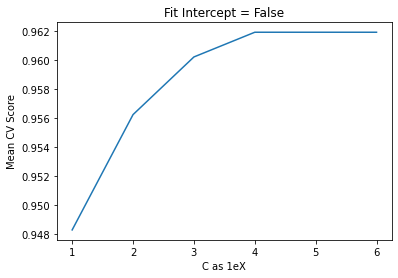

In [38]:
plt.plot([1,2,3,4,5,6], mean_scores_nofit)
plt.xlabel("C as 1eX")
plt.ylabel("Mean CV Score")
plt.title("Fit Intercept = False")

Text(0.5, 1.0, 'Fit Intercept = True')

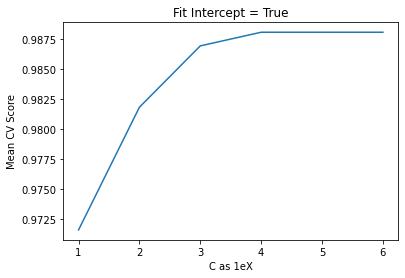

In [39]:
plt.plot([1,2,3,4,5,6], mean_scores_fit)
plt.xlabel("C as 1eX")
plt.ylabel("Mean CV Score")
plt.title("Fit Intercept = True")

In [44]:
final_logReg = LogisticRegression(solver = 'liblinear', C=1e4, fit_intercept=True)
final_logReg.fit(X_train_scaled, y_train)

LogisticRegression(C=10000.0, solver='liblinear')

In [45]:
final_logReg.score(X_train_scaled, y_train)

0.990909090909091

In [46]:
final_logReg.score(X_test_scaled, y_test)

0.9795454545454545

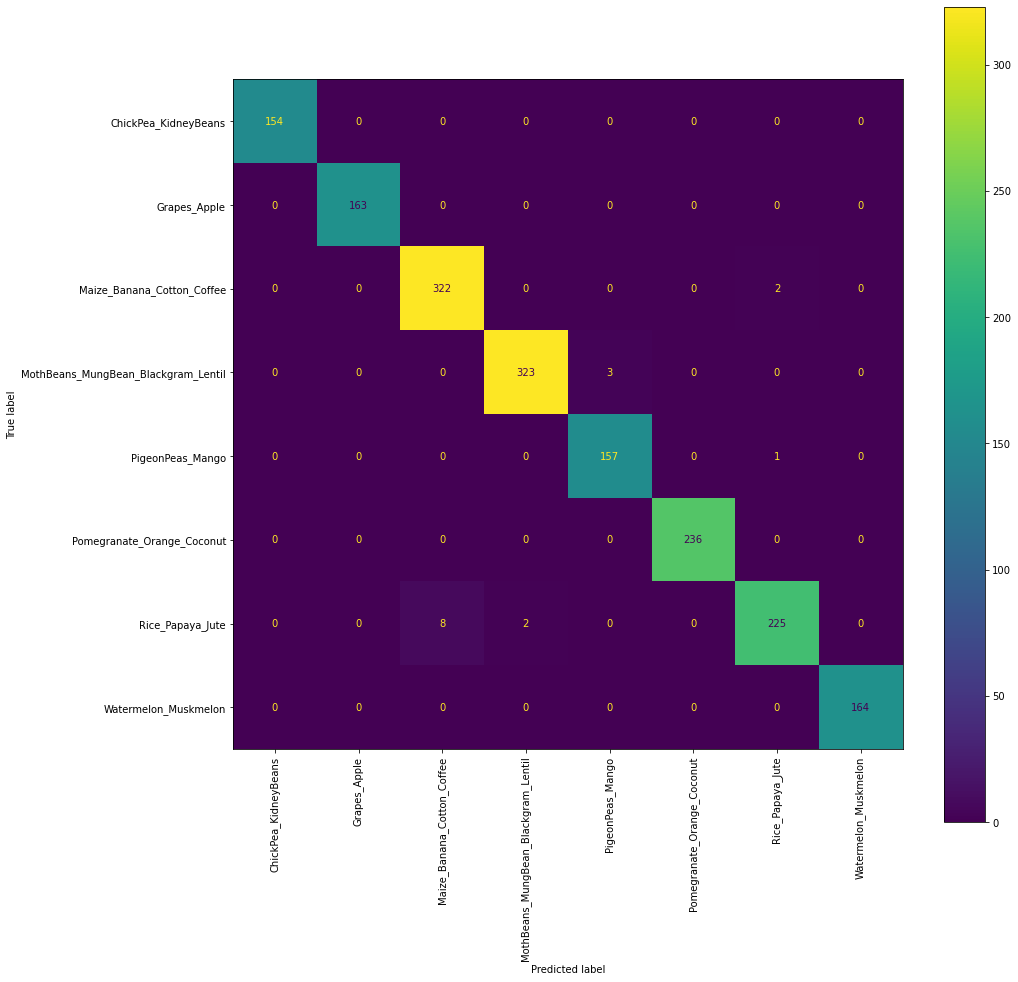

In [47]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=final_logReg,
                     X=X_train_scaled,
                     y_true=y_train,
                     ax = ax,
                     xticks_rotation='vertical')

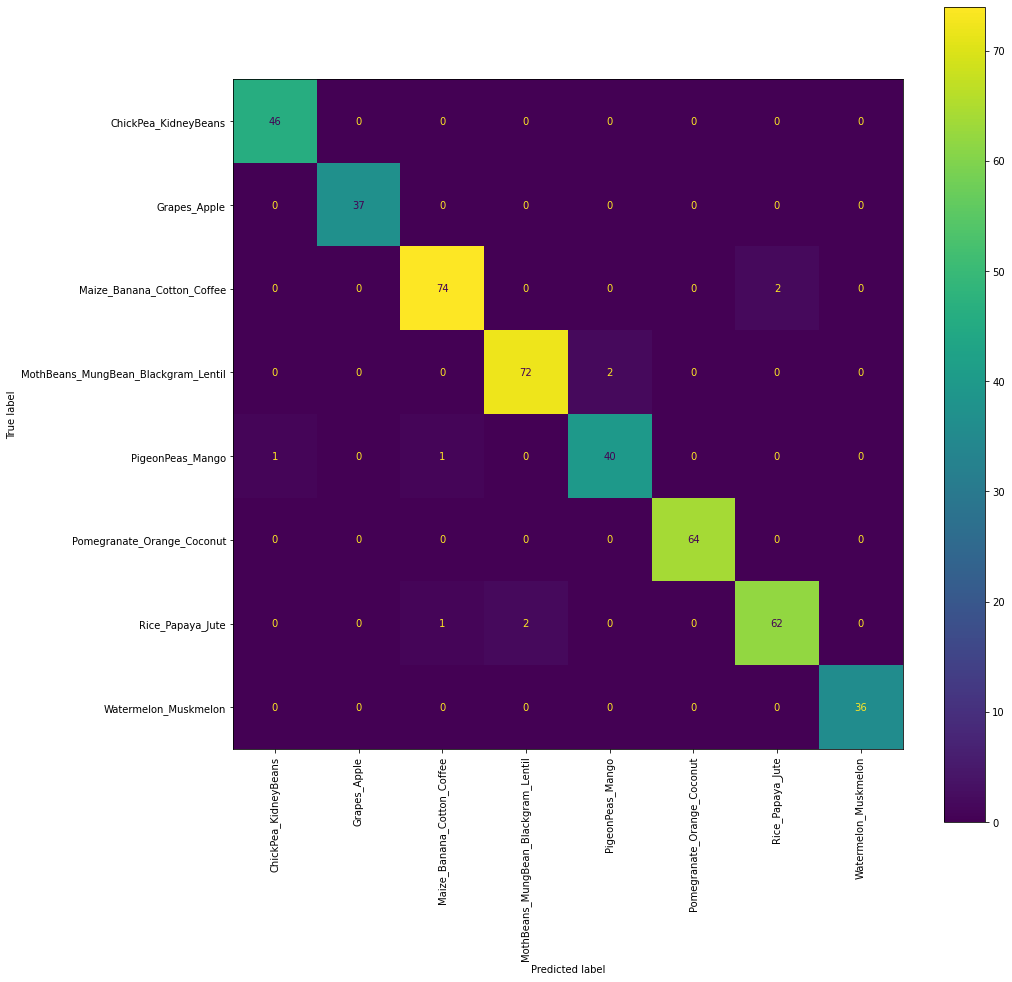

In [48]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=final_logReg,
                     X=X_test_scaled,
                     y_true=y_test,
                     ax = ax,
                     xticks_rotation='vertical')